Income Classifier System

Subsidies are provided to individuals on the basis of their salaries.
This model will help on planning monitoring and preventing misuse of the outlay.
Predicts if the salary of an individual is less than 50000 0r greater than 50000.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Importing Data

In [2]:
data = pd.read_csv('income(1).csv')

Making Copy of original data

In [3]:
df = data.copy()

Exploratory Data Analysis

1. Knowing the data
2. Pre-Processing (Removing missing values)
3. CrossTables and visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [5]:
df.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [6]:
df.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [7]:
df.describe(include = 'O')

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [8]:
df['JobType'].value_counts()

JobType
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [9]:
df['occupation'].value_counts()

occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64

In [10]:
np.unique(data['JobType'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [11]:
df = pd.read_csv('income(1).csv', na_values = ' ?')

In [12]:
df.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [13]:
missing = df[df.isnull().any(axis = 1)]
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [14]:
df2 = df.dropna(axis = 0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   JobType        30162 non-null  object
 2   EdType         30162 non-null  object
 3   maritalstatus  30162 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   30162 non-null  object
 6   race           30162 non-null  object
 7   gender         30162 non-null  object
 8   capitalgain    30162 non-null  int64 
 9   capitalloss    30162 non-null  int64 
 10  hoursperweek   30162 non-null  int64 
 11  nativecountry  30162 non-null  object
 12  SalStat        30162 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [15]:
df2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [16]:
df2.corr(numeric_only=True)

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [17]:
pd.crosstab(index = df2['gender'],
           columns = 'count')

col_0,count
gender,
Female,9782
Male,20380


In [18]:
pd.crosstab(index = df2['gender'],
           columns =  df2['SalStat'],
           margins = True)

SalStat,"greater than 50,000","less than or equal to 50,000",All
gender,,,
Female,1112,8670,9782
Male,6396,13984,20380
All,7508,22654,30162


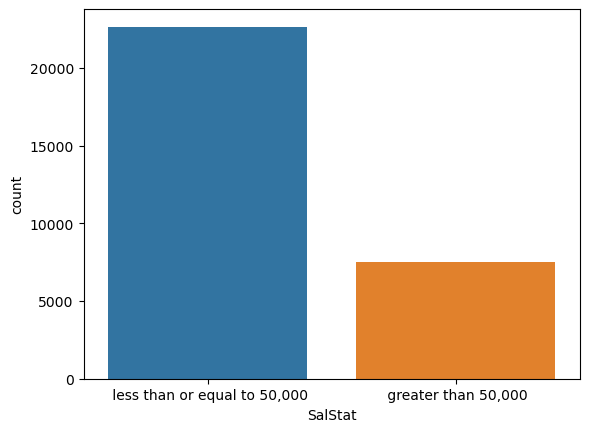

In [19]:
sns.countplot(df2 , x = 'SalStat')
plt.show()

C:\Users\tusha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


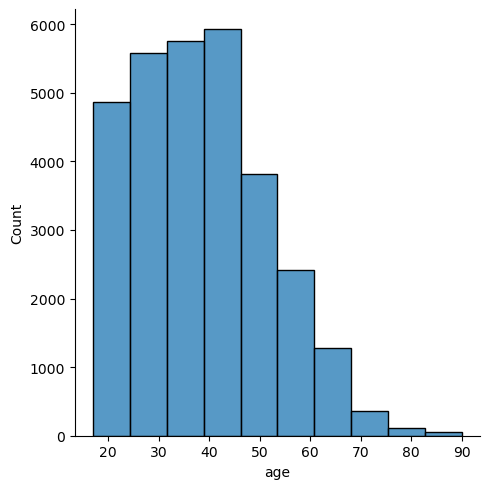

In [20]:
sns.displot(df2, x = 'age',bins = 10,kde = False)
plt.show()

In [21]:
pd.crosstab(index = df2['SalStat'],
           columns =  df2['age'],
           margins = True)

age,17,18,19,20,21,22,23,24,25,26,...,80,81,82,83,84,85,86,88,90,All
SalStat,,,,,,,,,,,,,,,,,,,,,
"greater than 50,000",0,0,1,0,3,12,12,30,53,61,...,1,2,0,2,1,0,0,0,7,7508
"less than or equal to 50,000",328,447,593,629,618,662,812,722,746,684,...,15,11,7,3,7,3,1,3,28,22654
All,328,447,594,629,621,674,824,752,799,745,...,16,13,7,5,8,3,1,3,35,30162


In [22]:
pd.crosstab(index = df2['JobType'],
           columns =  df2['SalStat'],
           margins = True)

SalStat,"greater than 50,000","less than or equal to 50,000",All
JobType,,,
Federal-gov,365,578,943
Local-gov,609,1458,2067
Private,4876,17410,22286
Self-emp-inc,600,474,1074
Self-emp-not-inc,714,1785,2499
State-gov,344,935,1279
Without-pay,0,14,14
All,7508,22654,30162


In [23]:
pd.crosstab(index = df2['EdType'],
           columns =  df2['SalStat'],
           margins = True)

SalStat,"greater than 50,000","less than or equal to 50,000",All
EdType,,,
10th,59,761,820
11th,59,989,1048
12th,29,348,377
1st-4th,6,145,151
5th-6th,12,276,288
7th-8th,35,522,557
9th,25,430,455
Assoc-acdm,256,752,1008
Assoc-voc,344,963,1307


In [24]:
pd.crosstab(index = df2['occupation'],
           columns =  df2['SalStat'],
           margins = True)

SalStat,"greater than 50,000","less than or equal to 50,000",All
occupation,,,
Adm-clerical,498,3223,3721
Armed-Forces,1,8,9
Craft-repair,908,3122,4030
Exec-managerial,1937,2055,3992
Farming-fishing,115,874,989
Handlers-cleaners,83,1267,1350
Machine-op-inspct,245,1721,1966
Other-service,132,3080,3212
Priv-house-serv,1,142,143


In [25]:
pd.crosstab(index = df2['hoursperweek'],
           columns =  df2['SalStat'],
           margins = True)

SalStat,"greater than 50,000","less than or equal to 50,000",All
hoursperweek,,,
1,1,6,7
2,2,13,15
3,1,23,24
4,2,25,27
5,6,32,38
...,...,...,...
96,1,4,5
97,1,1,2
98,3,8,11


Logistic Regression

In [26]:
pd.crosstab(index = df2['SalStat'],
           columns =  'count')

col_0,count
SalStat,
"greater than 50,000",7508
"less than or equal to 50,000",22654


Indexing the data as 0 or 1 as model needs numerical data

In [27]:
df2['SalStatCount'] = pd.factorize(df2.SalStat)[0]

C:\Users\tusha\AppData\Local\Temp\ipykernel_16172\4059691488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SalStatCount'] = pd.factorize(df2.SalStat)[0]


In [28]:
new_data = pd.get_dummies(df2, dtype = int ,drop_first = True )

In [29]:
column_list = list(new_data.columns)
column_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStatCount',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupatio

In [30]:
features = list(set(column_list)-set(['SalStat_ less than or equal to 50,000']))
features

['JobType_ Self-emp-inc',
 'EdType_ Doctorate',
 'race_ Black',
 'nativecountry_ India',
 'race_ White',
 'nativecountry_ China',
 'EdType_ 5th-6th',
 'EdType_ Some-college',
 'nativecountry_ Haiti',
 'JobType_ Local-gov',
 'nativecountry_ Thailand',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Separated',
 'relationship_ Unmarried',
 'nativecountry_ Ireland',
 'hoursperweek',
 'JobType_ Without-pay',
 'capitalgain',
 'occupation_ Transport-moving',
 'occupation_ Tech-support',
 'SalStatCount',
 'nativecountry_ Scotland',
 'capitalloss',
 'nativecountry_ Dominican-Republic',
 'occupation_ Craft-repair',
 'age',
 'nativecountry_ United-States',
 'occupation_ Sales',
 'nativecountry_ France',
 'EdType_ Assoc-voc',
 'relationship_ Not-in-family',
 'nativecountry_ Germany',
 'race_ Other',
 'nativecountry_ Outlying-US(Guam-USVI-etc)',
 'nativecountry_ Trinadad&Tobago',
 'nativecountry_ Puerto-Rico',
 'occupation_ Farming-fishing',
 'nativecountry_ Greece',
 'EdType_ Masters',


Storing Output as Y

In [31]:
y = new_data['SalStat_ less than or equal to 50,000'].values
y

array([1, 1, 0, ..., 1, 1, 1])

Storing Input as X

In [32]:
x = new_data[features].values
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [34]:
logistic = LogisticRegression()

In [35]:
logistic.fit(train_x,train_y)

C:\Users\tusha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
logistic.coef_

array([[-9.38885724e-02, -3.89080161e-01,  7.21612690e-01,
         7.34493760e-02,  8.54233453e-01,  6.02539533e-02,
         1.91243572e-01,  8.09355845e-01,  2.40542550e-02,
         5.20180510e-01,  6.98423653e-03,  2.94703233e-02,
         1.88132815e-01,  5.93440746e-01,  7.39102932e-03,
         1.34397224e-02,  1.05819740e-02, -1.01770606e-04,
         1.38324078e-01, -5.99662517e-02, -1.28385761e+01,
         2.57628308e-03, -2.93132731e-04,  3.75938774e-02,
         2.62435490e-01,  3.00599238e-02,  9.75768216e-01,
        -9.67135714e-02, -3.35114930e-03,  1.40270425e-01,
        -4.77973713e-01, -8.34743252e-03,  1.39684251e-01,
         1.22419649e-02,  6.52904451e-03,  6.22793742e-02,
         5.22733743e-01,  1.49481298e-02, -6.94132067e-01,
         4.61490140e-01,  9.56600370e-02,  3.07413549e-01,
         1.65462299e-03,  3.97030053e-03,  6.84992293e-02,
         1.95903972e+00,  1.52529208e-03,  6.05918795e-03,
         4.50274389e-02,  9.98365397e-01, -5.09151886e-0

In [37]:
logistic.intercept_

array([2.19192446])

In [38]:
prediction = logistic.predict(test_x)
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
conf = confusion_matrix(test_y,prediction)
conf

array([[2226,    0],
       [   0, 6823]], dtype=int64)

In [40]:
accuracyL = accuracy_score(test_y,prediction)
accuracyL

1.0

Using the K Nearest Neighbour Algorithm

In [41]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)

In [42]:
KNN_classifier.fit(train_x,train_y)

KNeighborsClassifier()

In [43]:
Prediction = KNN_classifier.predict(test_x)
Prediction

array([1, 1, 1, ..., 1, 1, 1])

In [44]:
cfm = confusion_matrix(test_y,Prediction)
print(cfm)

[[1832  394]
 [ 193 6630]]


In [45]:
accuracyN = accuracy_score(test_y,Prediction)
accuracyN

0.9351309536965411

In [46]:
(test_y != Prediction).sum()

587